<a href="https://colab.research.google.com/github/kilarson/Google_Colab/blob/main/PHANGS_MSA_Sym2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHANGS Datasets and Multiscale stellar associaions
#### Author: Kirsten Larson, ESA/STScI

Using the galaxy NGC 1566 as an example we'll show how to download the PHANGS HST and JWST data products. We then download the public Multiscale Stellar associations and MUSE HII region catalogs for comparison.

###References:
HST Treasury Program: ([Lee et al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJS..258...10L/abstract))

HST Stellar Associations([Larson et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.523.6061L/abstract))

MUSE Nebular Catalogue ([Groves et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.520.4902G/abstract
))

JWST Cyc1 Treasury Program: [(Lee et al. 2024](https://ui.adsabs.harvard.edu/abs/2023ApJ...944L..17L/abstract), [Williams et al. 2024](https://ui.adsabs.harvard.edu/abs/2024arXiv240115142W/abstract) )





In [2]:
#import packages
import numpy as np
from matplotlib import pyplot as plt, cm
from matplotlib import colors
import pandas as pd

from astropy.io import fits
from astropy.io import ascii
from astropy.wcs import WCS
from astropy.table import Table

import urllib.request

import os
import re
import copy

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D

In [3]:
#download NGC1566 pretty pictures from url

#url = 'https://archive.stsci.edu/files/live/sites/mast/files/home/hlsp/phangs/_images/ngc1566_color_thumb.png'
url ='https://stsci-opo.org/STScI-01HNGA4D5EHKRJA944QDQN7MYF.png'
filename = 'NGC1566_thumb.png'

urllib.request.urlretrieve(url, filename)

#plt.imshow(NGC1566_thumb.png,origin='lower')
#plt.show()

('NGC1566_thumb.png', <http.client.HTTPMessage at 0x78866b553cd0>)

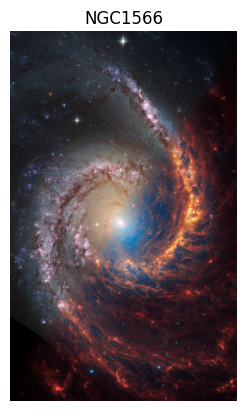

In [7]:
# open and display .png image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread('NGC1566_thumb.png')

# Create the plot
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Hide the axes
ax.set_axis_off()
# Set the title of the plot
ax.set_title('NGC1566')

# Show the plot
plt.show()

# PHANGS HST and JWST Pubic data

The PHANGS-HST Treasury Program (PID 15654, PI: JC Lee)
The PHANGS-JWST Cyc-1 Treasure Program (PID 2107, PI JC Lee)

Download both HST and JWST images for NGC1566 from MAST release page
https://archive.stsci.edu/hlsp/phangs.html#hst_image_products_table

In [5]:
#download both HST and JWST images for NGC1566 from MAST release page
#

HSTurl = 'https://archive.stsci.edu/hlsps/phangs-hst/ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_multi_v1_drc-bundle.tar.gz'
HSTdata_file = 'NGC1566_HST_bundle.tar.gz'

JWSTurl = 'https://archive.stsci.edu/hlsps/phangs-jwst/v1p0p1/ngc1566/hlsp_phangs-jwst_jwst_miri-nircam_ngc1566_multi_v1p0p1_img.tar.gz'
JWSTdata_file = 'NGC1566_JWST_bundle.tar.gz'

urllib.request.urlretrieve(HSTurl, HSTdata_file)
urllib.request.urlretrieve(JWSTurl, JWSTdata_file)


('NGC1566_JWST_bundle.tar.gz', <http.client.HTTPMessage at 0x78866b2b7760>)

In [6]:
# unpack HST file bundle

!tar -xvf NGC1566_HST_bundle.tar.gz


ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f438w_v1_err-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f438w_v1_exp-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f336w_v1_err-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f275w_v1_err-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f275w_v1_exp-drc-sci.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f555w_v1_err-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f275w_v1_exp-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f438w_v1_exp-drc-sci.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f555w_v1_exp-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f814w_v1_exp-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f814w_v1_exp-drc-sci.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f336w_v1_exp-drc-wht.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f555w_v1_exp-drc-sci.fits
ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f336w_v1_exp-drc-s

In [7]:
# unpack JWST file bundle

!tar -xvf NGC1566_JWST_bundle.tar.gz

hlsp_phangs-jwst_jwst_miri_ngc1566_f1000w_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_miri_ngc1566_f1130w_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_miri_ngc1566_f2100w_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_miri_ngc1566_f770w_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_nircam_ngc1566_f300m_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_nircam_ngc1566_f335m_v1p0p1_img.fits
hlsp_phangs-jwst_jwst_nircam_ngc1566_f360m_v1p0p1_img.fits


NGC 1566


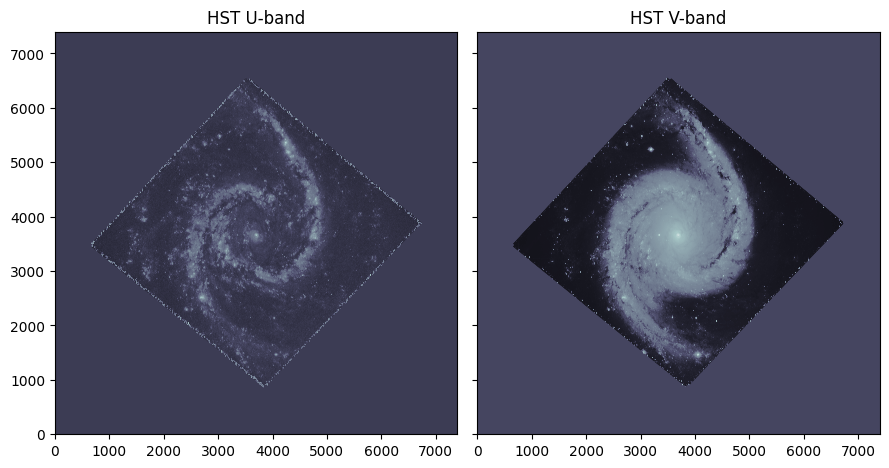

In [27]:
Vband_file = 'ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f555w_v1_exp-drc-sci.fits'
Uband_file = 'ngc1566/hlsp_phangs-hst_hst_wfc3-uvis_ngc1566_f275w_v1_exp-drc-sci.fits'
vimg = fits.getdata(Vband_file)
vhdr = fits.getheader(Vband_file)
vw = WCS(Vband_file) #WCS info

uimg = fits.getdata(Uband_file)
uhdr = fits.getheader(Uband_file)
uw = WCS(Uband_file) #WCS info

#Plot HST
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)


ax[0].imshow(uimg.data,origin='lower',cmap=cm.bone, norm=colors.SymLogNorm(0.005))
ax[0].set_title('HST U-band')

ax[1].imshow(vimg.data,origin='lower',cmap=cm.bone, norm=colors.SymLogNorm(0.025))
ax[1].set_title('HST V-band')
fig.tight_layout()
print('NGC 1566')
plt.show()

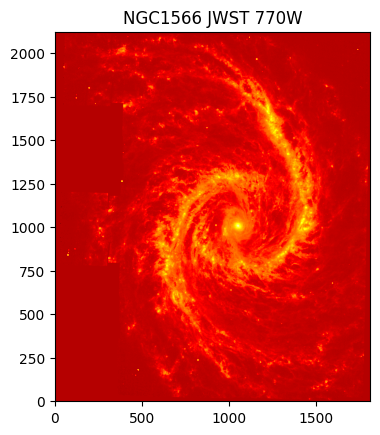

In [14]:
j770_file = 'hlsp_phangs-jwst_jwst_miri_ngc1566_f770w_v1p0p1_img.fits'
j770img = fits.getdata(j770_file)
j770hdr = fits.getheader(j770_file,1)
j770w = WCS(j770_file) #WCS info

#cmap = cm.winter
#cmap.set_bad('black',1)

plt.imshow(j770img,origin='lower', cmap=cm.hot, norm=colors.SymLogNorm(5))
plt.title('NGC1566 JWST 770W')

plt.show()

# Downloading PHANGS data catalogues

To find all Public PHANGS data see:
https://sites.google.com/view/phangs/home/data

## PHANGS-HST Multi-scale Stellar Association catalogue

PHANGS-HST public data catalogues: https://archive.stsci.edu/hlsp/phangs

Reference: HST Stellar Associations([Larson et al. 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.523.6061L/abstract))

In [15]:
#Download and unpack Multi-scale stellar association data for NGC1566
#
url = 'https://archive.stsci.edu/hlsps/phangs-cat/bundles/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-cats.tar.gz'
filename = 'NGC1566_MSA_bundle.fits.tar.gz'

urllib.request.urlretrieve(url, filename)

# unpack file bundle
!tar -xvf NGC1566_MSA_bundle.fits.tar.gz

ngc1566/assoc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-brightstarmask.reg
ngc1566/assoc/vselect/ws64pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws64pc-main.fits
ngc1566/assoc/vselect/ws64pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws64pc-peaks.reg
ngc1566/assoc/vselect/ws64pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws64pc-region.reg
ngc1566/assoc/vselect/ws64pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws64pc-idmask.fits
ngc1566/assoc/vselect/ws32pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws32pc-idmask.fits
ngc1566/assoc/vselect/ws32pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws32pc-region.reg
ngc1566/assoc/vselect/ws32pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws32pc-peaks.reg
ngc1566/assoc/vselect/ws32pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws32pc-main.fits
ngc1566/assoc/vselect/ws16pc/hlsp_phangs-cat_hst_wfc3_ngc1566_multi_v1_assoc-vselect-ws16pc-main.

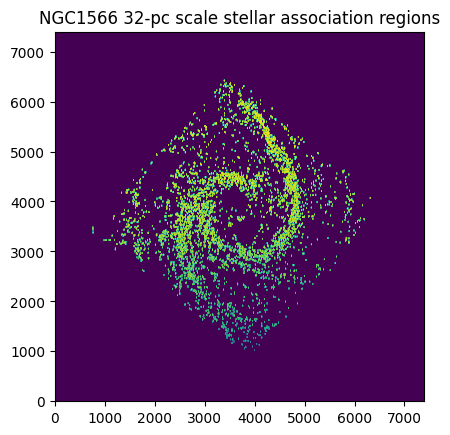

In [16]:
#Load Stellar association IDmasks and data files

tracer_band = 'v'
gal = 'ngc1566'
#16pc scale regions
msa16_files = gal+'/assoc/'+tracer_band+'select/ws16pc/hlsp_phangs-cat_hst_wfc3_'+gal+'_multi_v1_assoc-'+tracer_band+'select-ws16pc-'
#ws16_file = ws16_files+'-idmask.fits'
msa16_idmap = fits.getdata(msa16_files+'idmask.fits')
msa16_num_markers= np.max(msa16_idmap)#-1
#ws16_data_file = 'PHANGS_IR3_hst_wfc3_'+gal+'_v1p3_multi_assoc-vselect-ws32pc-main.fits'
msa16_data_tbl =  Table.read(msa16_files+'main.fits')
msa16_data_df = msa16_data_tbl.to_pandas()

#32pc scale regions
msa32_files = gal+'/assoc/'+tracer_band+'select/ws32pc/hlsp_phangs-cat_hst_wfc3_'+gal+'_multi_v1_assoc-'+tracer_band+'select-ws32pc-'
msa32_idmap = fits.getdata(msa32_files+'idmask.fits')
msa32_num_markers= np.max(msa32_idmap)#-1

msa32_data_tbl =  Table.read(msa32_files+'main.fits')
msa32_data_df = msa32_data_tbl.to_pandas()

#cluster files
#comactcluster_file = 'PHANGS_IR3_'+gal+'_phangs-hst_v1p1_human_class12.fits'
#cc_tbl = Table.read(catdir+comactcluster_file, format='fits')
#cc_df = cc_tbl.to_pandas()

#show stellar association IDmap
plt.imshow(msa32_idmap.data,origin='lower',norm=colors.SymLogNorm(0.025))
plt.title('NGC1566 32-pc scale stellar association regions')
plt.show()

In [17]:
# Look at Stellar Association Table

msa32_data_tbl

reg_id,reg_x,reg_y,reg_ra,reg_dec,reg_area,reg_rad,NUV_dolflux_mjy,NUV_dolflux_mjy_err,U_dolflux_mjy,U_dolflux_mjy_err,B_dolflux_mjy,B_dolflux_mjy_err,V_dolflux_mjy,V_dolflux_mjy_err,I_dolflux_mjy,I_dolflux_mjy_err,NUV_dolmag_vega,NUV_dolmag_vega_err,U_dolmag_vega,U_dolmag_vega_err,B_dolmag_vega,B_dolmag_vega_err,V_dolmag_vega,V_dolmag_vega_err,I_dolmag_vega,I_dolmag_vega_err,reg_dolflux_Age_MinChiSq,reg_dolflux_Age_MinChiSq_err,reg_dolflux_Mass_MinChiSq,reg_dolflux_Mass_MinChiSq_err,reg_dolflux_Ebv_MinChiSq,reg_dolflux_Ebv_MinChiSq_err,reg_dolflux_ChiSq_Reduced
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,3984.0,1011.0,64.99608678029121,-54.9669971546529,2067.9749706766897,25.65651725287407,0.0005715492506730203,5.370089214494829e-05,0.0008133100649228698,8.382766334614129e-05,0.0009995945520428963,8.84365902733887e-05,0.0017614063964222755,6.179617247004037e-05,0.0007967044212913061,8.296843596070182e-05,23.0164681554633,0.10241282333773989,22.98601406200051,0.11234602519760935,24.081699480323966,0.09643498276474897,23.333937488249887,0.038240935271473715,23.737495839341705,0.1135121040882215,5.0,1.0,2279.6095870768545,313.191,0.32,0.06,10.234294461468622
2.0,3786.0,1049.0,64.99988281977876,-54.96657905410533,1673.5057566169744,23.080152229061827,0.0005978304163182698,4.284859929549414e-05,0.0006790460428784317,5.5481858454385885e-05,0.0010065695717113253,5.8314989525487195e-05,0.0009458222877581403,3.3216564294359295e-05,0.0010120485822817504,5.5923163236274906e-05,22.96765728665948,0.07812411673484353,23.181906372302176,0.08905909451873115,24.074149687355405,0.06314848011420954,24.009062551799907,0.03827997663987172,23.47773550545264,0.06023055512820201,53.0,52.0,5523.877433290166,4784.638,0.0,0.56,0.2097789938527184
3.0,3789.0,1062.0,64.99982531096254,-54.96643598112857,1649.5985315224461,22.914700975964273,0.0010204160972337403,4.3427990184400026e-05,0.0010400891242269635,4.9747788780478355e-05,0.001083031774357728,6.206563407767486e-05,0.0010206056142218211,3.055971607754422e-05,0.0006693129618722865,4.432419319031788e-05,22.38715905208342,0.046389418423838286,22.718978041186773,0.05213504161100012,23.994656185800824,0.06246496432183173,23.9264415285451,0.03263757328037146,23.92666581852762,0.07218352748211876,4.0,1.0,1264.9604709983755,152.802,0.19,0.06,0.16596815398395443
4.0,3817.0,1074.0,64.99928851459298,-54.966303905799585,4482.604705224038,37.773765943135565,0.002065680278144123,7.541766916619214e-05,0.0020085443772541686,8.961180895699245e-05,0.001886976757453338,0.00010835451953748134,0.0017837893256335549,5.5052869893760934e-05,0.0011867455440876815,9.339304790588303e-05,21.621444546844504,0.03979573231197493,22.00445085015444,0.048630676458666755,23.39184280442705,0.06259029202630507,23.320227509207697,0.033640535528424186,23.304844883203916,0.0857794855220381,2.0,4.0,5902.850749307842,4601.493,0.27,0.27,0.11917398678788192
5.0,3954.0,1089.0,64.99666203921635,-54.96613874587922,1458.3407307662205,21.54540025219726,1.045797275798138e-05,1.729631370371607e-05,0.0001643028192742171,3.3867218382433935e-05,0.0004321879641819703,4.493624164174448e-05,0.0005785120205003278,2.441303410207098e-05,0.0006836342247947564,4.5977424928167296e-05,27.36048353923338,1.8027377172752899,24.722541890191806,0.22467823863230477,24.99207751094743,0.11333148409676332,24.54280544283507,0.04599767373587753,23.903679415821188,0.0733073204267212,667.0,234.0,14474.843877309135,2605.057,0.0,0.17,1.8118324509424952
6.0,4082.0,1124.0,64.99420816762765,-54.96575342879938,1936.4852326567845,24.827452426770908,0.0020858186009608134,8.887423344622087e-05,0.0032554084912855444,0.00012341083529692263,0.007012696235878698,0.00016467106637030793,0.0012806747605967799,5.5320902661801275e-05,0.0008540319863899862,8.76795335

##The PHANGS MUSE Nebular Catalogue

Download HII region catalog from the [PHANGS MUSE Nebular Catalogue (Groves et al 2023)](https://ui.adsabs.harvard.edu/abs/2023MNRAS.520.4902G/abstract):

[[HII Data link]](https://www.canfar.net/storage/vault/list/phangs/RELEASES/Groves_etal_2023/
)




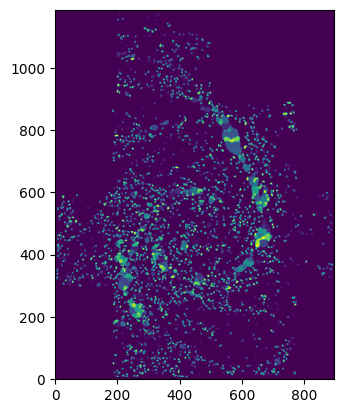

In [35]:
#download files from url

url = 'https://www.canfar.net/storage/vault/file/phangs/RELEASES/Groves_etal_2023/spatial_masks/NGC1566_nebulae_mask_V2.fits'
filename = 'NGC1566_nebulae_mask_V2.fits'

urllib.request.urlretrieve(url, filename)

nebula_mask = fits.getdata(filename)
nebula_mask_hdr = fits.getheader(filename)
nebula_mask_w = WCS(filename) #WCS info

plt.imshow(nebula_mask,origin='lower')

plt.show()

# Separate Association catalogue into 3-age bins
Use the SED fit estimated ages from the Stellar Association catalogue to group the association by age and create an age map


*   'Young' Age < 5 Myr
*   'Intermediate 5 Myr < Age < 20 Myr
*   'Old  Age > 20 Myr




In [28]:
#Create 3 age bin region map
# This will take a ~15 minutes to run on the Google Colab server!!!

msa32_idmap_age3 = np.empty_like(msa32_idmap)

msa32_age1 = np.where(msa32_data_df.reg_dolflux_Age_MinChiSq < 5)
msa32_age2 = np.where( (msa32_data_df.reg_dolflux_Age_MinChiSq >= 5) & (msa32_data_df.reg_dolflux_Age_MinChiSq < 20))
msa32_age3 = np.where(msa32_data_df.reg_dolflux_Age_MinChiSq > 20)


for n in msa32_age1[0]:
    id_tmp = np.where(msa32_idmap == n+1)#reg_id = index+1
    msa32_idmap_age3[id_tmp] = 1
print('age1 finished')

for n in msa32_age2[0]:
    id_tmp = np.where(msa32_idmap == n+1)
    msa32_idmap_age3[id_tmp] = 2
print('age2 finished')

for n in msa32_age3[0]:
    id_tmp = np.where(msa32_idmap == n+1)
    msa32_idmap_age3[id_tmp] = 3
print('age3 finished')

age1 finished
age2 finished
age3 finished


## Matching HST and JWST data

Projecting the JWST data to the HST pixel grid will allow for common image cutout areas and easy comparison to the HST-defined stellar association map.


In [20]:
#install Package reproject (Have to install in the notebook to get it to run on Google Colab)
!pip install reproject

from reproject import reproject_interp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 23.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=beb2f630dcb950067c2e733b081d88df5cbadc117a8b486baa1ef5beb12418d4
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [21]:
#Reproject JWST data to HST data.
jwst_array, jwst_footprint = reproject_interp((j770img, j770hdr), vhdr)

#Reproject MUSE Nebula data to HST data.


Set DATE-AVG to '2022-11-22T11:04:08.058' from MJD-AVG.
Set DATE-END to '2022-11-22T12:35:32.733' from MJD-END'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-11-22T11:04:08.058' from MJD-AVG.
Set DATE-END to '2022-11-22T12:35:32.733' from MJD-END'.
Set OBSGEO-B to    19.733757 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564020048.840 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.733757 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564020048.840 from OBSGEO-[XYZ]'.


In [36]:
#Reproject MUSE Nebula data to HST data.
nebula_array, MUSE_footprint = reproject_interp((nebula_mask, nebula_mask_hdr), vhdr)


NGC 1566


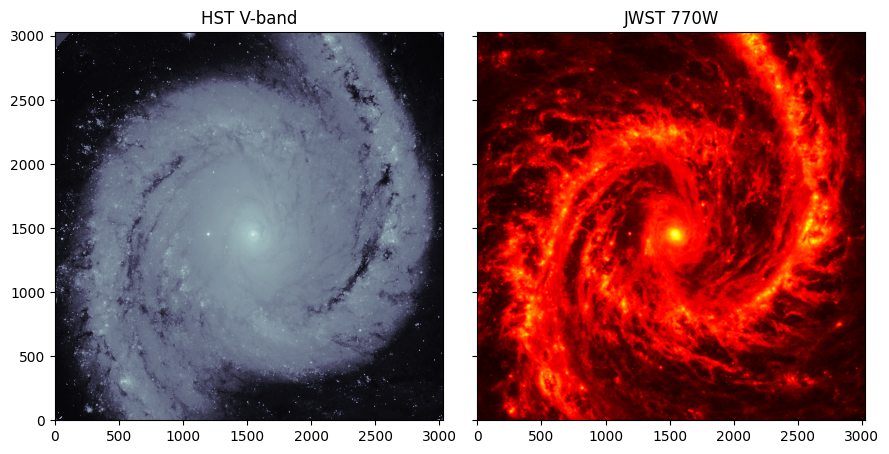

In [45]:
# Define center RA and DEC
obj_coords = SkyCoord(ra=vhdr['RA_TARG']*u.degree, dec=vhdr['Dec_TARG']*u.degree, frame='fk5')

# Create 2D cutouts of the object in each band in a large 2 by 2 arcmin box
size_full = u.Quantity((2, 2), u.arcmin)
stamp_hst = Cutout2D(vimg, obj_coords, size_full, wcs=vw)
stamp_msa32 = Cutout2D(msa32_idmap, obj_coords, size_full, wcs=vw)
stamp_msa32_age3 = Cutout2D(msa32_idmap_age3, obj_coords, size_full, wcs=vw)

#stamp_nebula = Cutout2D(nebula_array, obj_coords, size_full, wcs=vw)
stamp_jwst = Cutout2D(jwst_array, obj_coords, size_full, wcs=vw)

#Plot HST and JWST large stamp images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)

ax[0].imshow(stamp_hst.data, origin='lower', cmap=cm.bone, norm=colors.SymLogNorm(0.025))#LogNorm()
ax[0].set_title('HST V-band')

ax[1].imshow(stamp_jwst.data, origin='lower', cmap=cm.hot, norm=colors.SymLogNorm(4)) #
ax[1].set_title('JWST 770W')
fig.tight_layout()
print('NGC 1566')
plt.show()

<ipython-input-46-f1595bbfc3c5>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  msa_cmap = copy.copy(plt.cm.get_cmap('prism')) # get a copy of th color map
<ipython-input-46-f1595bbfc3c5>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  msa3_cmap = copy.copy(plt.cm.get_cmap('jet')) # get a copy of the color map


NGC 1566


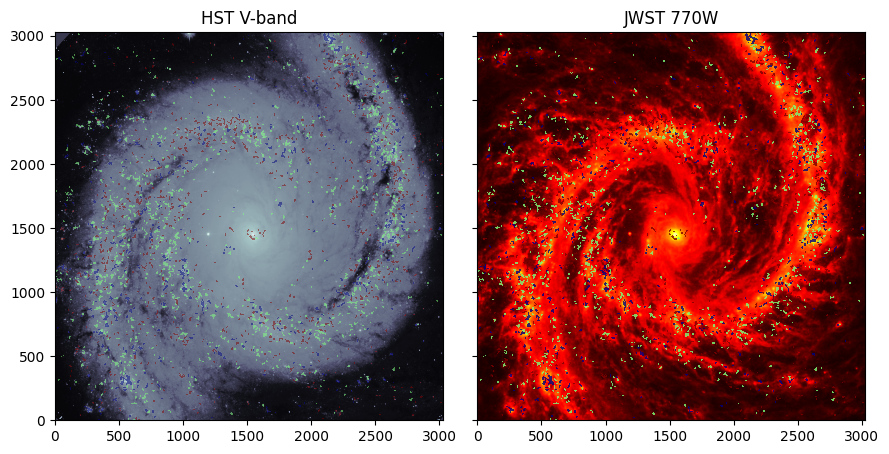

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)
#refimg_plus = refimg(refimg<0 == 0)
#color0 = label2rgb(ws_idmap0, image=refimg_plus, bg_label=0)
cmap = cm.bone
cmap.set_bad('black',1)
msa_cmap = copy.copy(plt.cm.get_cmap('prism')) # get a copy of th color map
msa_cmap.set_bad('white',alpha=0) # set how the colormap handles 'bad' values
msa_cmap.set_under('white',alpha=0)
#for age3 msa
msa3_cmap = copy.copy(plt.cm.get_cmap('jet')) # get a copy of the color map
msa3_cmap.set_bad('white',alpha=0) # set how the colormap handles 'bad' values
msa3_cmap.set_under('white',alpha=0)

ax[0].imshow(stamp_hst.data, origin='lower', cmap=cm.bone, norm=colors.SymLogNorm(0.025))#LogNorm()
ax[0].imshow(stamp_msa32_age3.data, origin='lower',cmap = msa3_cmap,alpha=0.5,vmin=1,interpolation='nearest')

ax[0].set_title('HST V-band')

#color2 = label2rgb(expanded0, image=refimg_plus, bg_label=0)
#cmap=cm.gist_heat
cmap = cm.winter
cmap.set_bad('black',1)
ax[1].imshow(stamp_jwst.data, origin='lower', cmap=cm.hot, norm=colors.SymLogNorm(4)) # AsinhNorm LogNorm()
ax[1].imshow(stamp_msa32_age3.data, origin='lower',cmap = msa3_cmap,alpha=0.8,vmin=1,interpolation='nearest')

#colors.AsinhNorm
ax[1].set_title('JWST 770W')
fig.tight_layout()
print('NGC 1566')
plt.show()

In [40]:
# Define center RA and DEC of interesting region
obj_coords_sml = SkyCoord(ra=64.9817356*u.degree, dec=-54.9377272*u.degree, frame='fk5')

# Create 2D cutouts of the object in each band in smaller box
size_sml = u.Quantity((41, 25), u.arcsec) #y,x?
stamp_hst_sml = Cutout2D(vimg, obj_coords_sml, size_sml, wcs=vw)
stamp_msa32_sml = Cutout2D(msa32_idmap, obj_coords_sml, size_sml, wcs=vw)
stamp_msa32_sml_age3 = Cutout2D(msa32_idmap_age3, obj_coords_sml, size_sml, wcs=vw)
stamp_nebula_sml = Cutout2D(nebula_array, obj_coords_sml, size_sml, wcs=vw)

stamp_jwst_sml = Cutout2D(jwst_array, obj_coords_sml, size_sml, wcs=vw)



<ipython-input-47-6eb6add1016d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  msa3_cmap = copy.copy(plt.cm.get_cmap('jet')) # get a copy of the color map


NGC 1566


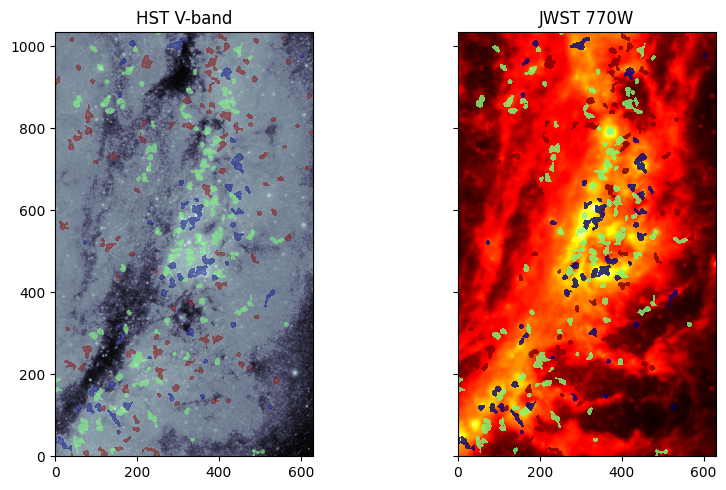

In [47]:
#Plot HST and JWST Small stamp images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5),
                         sharex=True, sharey=True)
#for age3 msa
msa3_cmap = copy.copy(plt.cm.get_cmap('jet')) # get a copy of the color map
msa3_cmap.set_bad('white',alpha=0) # set how the colormap handles 'bad' values
msa3_cmap.set_under('white',alpha=0)

ax[0].imshow(stamp_hst_sml.data, origin='lower', cmap=cm.bone, norm=colors.SymLogNorm(0.025))#LogNorm()
ax[0].imshow(stamp_msa32_sml_age3.data, origin='lower',cmap = msa3_cmap,alpha=0.5,vmin=1,interpolation='nearest')

ax[0].set_title('HST V-band')


cmap = cm.winter
cmap.set_bad('black',1)
ax[1].imshow(stamp_jwst_sml.data, origin='lower', cmap=cm.hot, norm=colors.SymLogNorm(4)) # AsinhNorm LogNorm()
ax[1].imshow(stamp_msa32_sml_age3.data, origin='lower',cmap = msa3_cmap,alpha=0.8,vmin=1,interpolation='nearest')

ax[1].set_title('JWST 770W')
fig.tight_layout()
print('NGC 1566')
plt.show()

#Creating color images and cutouts using the Sundog server.

## Access Sundog viewer for NGC 1566 at:
Sundog interactive viewer links for other galaxies available from the data table.
